# <center>Online Shoppers Intention</center>
#### <center>Final Project - Fan Yang (Jason Yang)</center>


## 1) Introduction
#### Project Requirement A: <br><br>In this section, you should describe the problem that you are solving, any background information that will help the instructors to understand the program.

We will analyze online shoppers' behaviors, based on the analysis to figure out how people review different websites and if people generate any revenue for busniess. This would support merchants to target the potential buyers and fully utilize advertisements.

We will utilize the "Online Shoppers Purchasing Intention Dataset", which is from UCI website (in below section with the website address). It include 17 features and 1 target columns, we will utilize both Classification and Cluster to train the data sets and forecast if people buy products or not based on the 17 different features.

17 features: <br>
  &ensp;  1) Administrative <br>
  &ensp;  2) Administrative_Duration <br>
  &ensp;  3) Informational <br>
  &ensp;  4) Informational_Duration <br>
  &ensp;  5) ProductRelated <br>
  &ensp;  6) ProductRelated_Duration: <br> 
  &ensp;represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. <br>
 
 &ensp;   7) BounceRates  <br>
 &ensp;   8) ExitRates  <br>
 &ensp;   9) PageValues:  <br>
 &ensp;features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.
 
  &ensp;   10) SpecialDay:  <br>
   &ensp;The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. <br>
   
  &ensp;   11) Month  <br>
  &ensp;   12) OperatingSystems  <br>
  &ensp;   13) Browser  <br>
  &ensp;   14) Region  <br>
  &ensp;   15) TrafficType  <br>
  &ensp;   16) VisitorType  <br>
  &ensp;   17) Weekend  <br>
                
 1 target: <br>
 &ensp; 1) Revenue
 
 
 
 

#### Project Requirement B: <br><br>If you are using a Jupyter notebook, make sure to add the above steps in Markdown cells and code cells. You add the link from where you obtained the data.

Project Data Source is from UCI Machine Learning Repository: <a href="https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset">Online Shoppers Intention</a> <br>
Source:<br>
&emsp;    1. C. Okan Sakar Department of Computer Engineering, Faculty of Engineering and Natural Sciences, Bahcesehir University, 34349 Besiktas, Istanbul, Turkey <br>
&emsp;    2. Yomi Kastro Inveon Information Technologies Consultancy and Trade, 34335 Istanbul, Turkey

## 2) Requirements - Import all python models
#### (Requirements - List all the Python modules that need to be installed. If some of these modules need a specific version, please indicate so. You can also list any other conditions that are needed to run the program.)

In [2]:
# Set display be 90% of the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Import 'os' to create folder. Import 'urllib' to get data directly from website
import os
from six.moves import urllib

# Import two most important packages to import, clean and do statatistic calculation: numpy & pandas
import numpy as np
import pandas as pd

# Import two visualization packages: matplotlib & seaborn & pandas.plotting (use to check correlation)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Import 'LabelEncoder', which would be used to transform 'Categorical' to numerical data type
from sklearn.preprocessing import LabelEncoder

# Import 'StandardScaler' model, data's mean will be zero and its standard deviation will be one
from sklearn.preprocessing import StandardScaler

# Import three models to split columns based on different data types, and build Pipeline
from sklearn.compose import make_column_selector as col_selector
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline

# Import 'train_test_split' to split data for train set and test set
# Import 'cross_val_score' to value the model's accuracy
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Improt five classification models, we will test each of the models and find the best mdoel
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

# Import model evaluation metrics, test the best model for the project
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

# Import 'GridSearchCV' to find the best parameters
from sklearn.model_selection import GridSearchCV

## 3) Description of the Python program. Get data set from website, Discover and Visualize the data to gain insights.

#### a) &ensp; Create function to get data source from website and create a folder to save the file (Benefit: if the data source update new information, run the function would get updated information. The data source is directly connect with the website data source)

In [3]:
# Set up the data source website location
download_root = "https://archive.ics.uci.edu//ml/"
machine_learning_databases_path = "machine-learning-databases/00468"
shopper_file = "/online_shoppers_intention.csv"
shopper_url = download_root + machine_learning_databases_path + shopper_file

# Build a function: create a new folder to save data source. Then retrieve the .csv file to the folder
def fetch_shopper_data(web_shopper_url = shopper_url, shopper_path = machine_learning_databases_path):
    if not os.path.isdir(shopper_path):
        os.makedirs(shopper_path)
    csv_path = os.path.join(shopper_path, 'online_shoppers_intention.csv')
    urllib.request.urlretrieve(web_shopper_url, csv_path)

# Call the function to get data source
fetch_shopper_data()


#### <br>b) &ensp; Get data from .csv file, and get the first look about the data structure

In [4]:
df = pd.read_csv(machine_learning_databases_path + shopper_file)

In [5]:
print('Data Source Structure: ')
print('Total Rows: ')
print(df.shape[0])

print("\n")

print('Total Columns: ')
print(df.shape[1])

Data Source Structure: 
Total Rows: 
12330


Total Columns: 
18


In [6]:
print('Data Soucre Columns: ')
print(df.columns)

Data Soucre Columns: 
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


In [7]:
print('First Five rows of the data: ')
# print(df.head()) # since we are using Jupyter notebook, we don't use print function would easy to read
df.head()

First Five rows of the data: 


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [8]:
print('Data type of each column: ')
print(df.dtypes)

Data type of each column: 
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


In [9]:
print('Check if there are missing values for each column:')
print(df.isnull().sum())

Check if there are missing values for each column:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


##### <br>From above observation, our conclusions:
#####  -- There are no missing values (we don't need to fill Nan)
#####  -- There are two columns with data type as 'object', we will need to convert them to numerical: 'Month' and 'VisitorType'
#####  -- There are two columns with data type as 'bool', we will need to convert them to numerical: 'Weekend' and 'Revenue'

#### <br><br>c) Clean up the data and take a deep look about the data structue and relationship

##### <br> - Check Labels (count True and Flase values)

                          Figure 1 - "Count of Revnue"                          


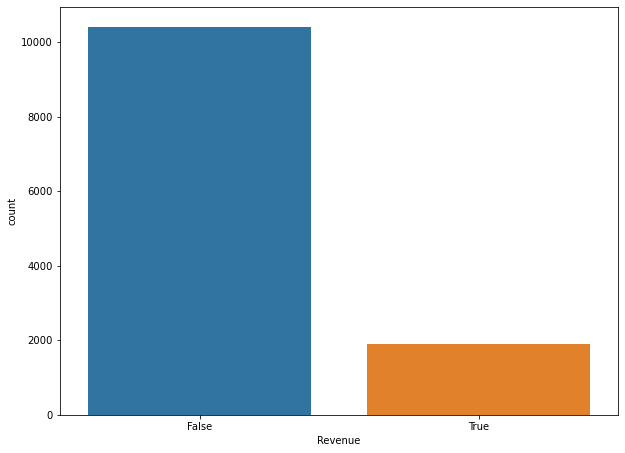

In [10]:
fig, ax1 = plt.subplots(figsize=(10,7.5))
sns.countplot(x='Revenue', data=df, ax=ax1)
location_string1 = 'Figure 1 - "Count of Revnue"'.center(80)
print(location_string1)
plt.show()

sns.countplot(x='VisitorType', data=df)
plt.show()

##### <br> - Check data relationship (Correlation between each Features and Label)

                                       Figure 2 - "Correlation Matrix"                                        


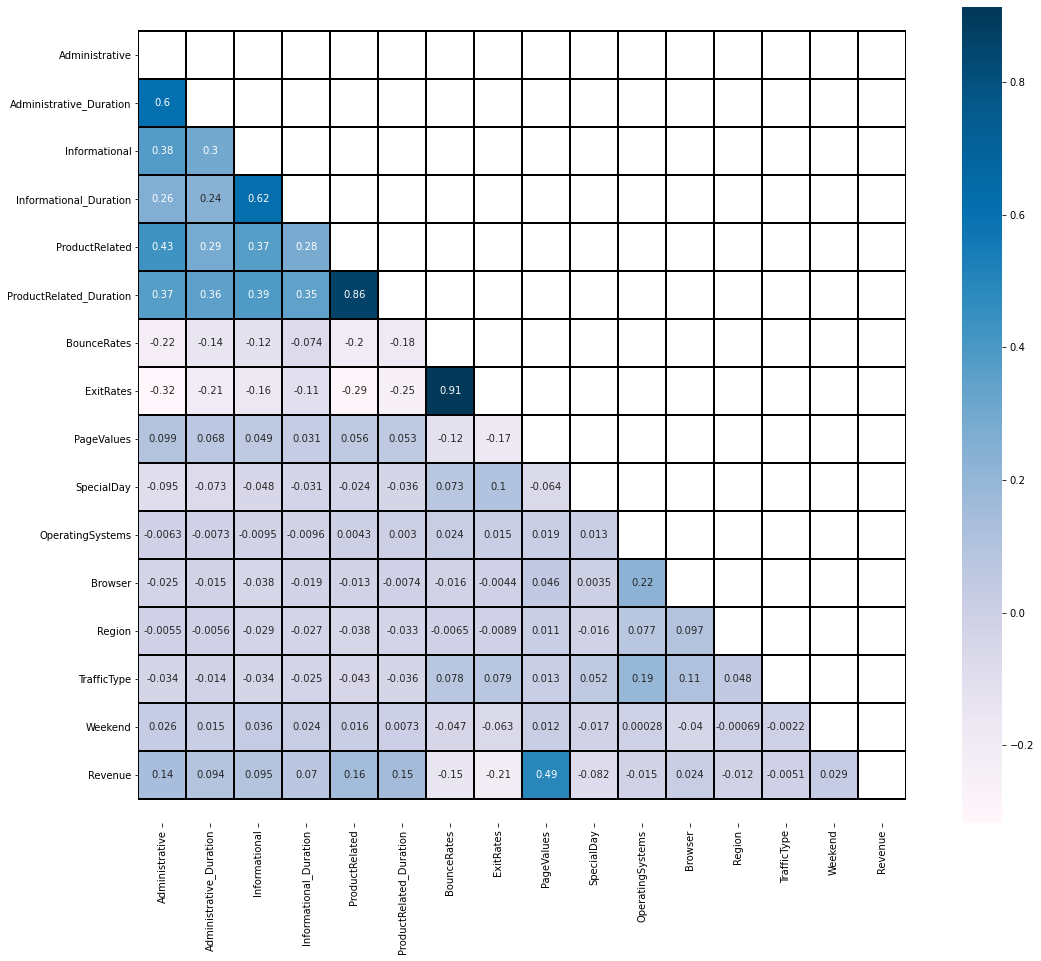

In [11]:
fig, ax = plt.subplots(figsize=(20,15))
matrix = np.triu(df.corr())  # calculate correlation between all features and labels, only use half matrix
ax = sns.heatmap(df.corr(), annot = True, square = True, linewidth=1, linecolor='black', 
                 mask = matrix, cmap = plt.cm.PuBu)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
location_string2 = 'Figure 2 - "Correlation Matrix"'.center(110)
print(location_string2)
plt.show()

##### Conclusion based on above: Figure 2 - "Correlation Matrix"
##### -- only four pairs has correlations higher than 0.5: Administrative - Administrative_Duration; Informational - Informational_Duration; ProductRelated - ProductRelated_Duration; BounceRates - ExitRates
##### -- The most significent pairs are ProductRelated - ProductRelated_Duration with 0.86 (shoppers would stay on the same website page longer when they check specifc products). BounceRates - Exit Rates  with 0.91 (which tell us most shopper would exit website if they stop review, which make sense).
#####  -- The most promising attribute to predict the 'Revenue' is the 'PageValues', so we will zoom in on their correlation scatterplot below.
##### -- Blow would take a deep look about the relationship between them, which has relative high correlations <br>

##### -- Use 'LabelEncoder' to transform 'object' to numercial data type. Since we will plot the relationship between PageValues and Revenue, have to transform the type of Revenue to numerical type. (Also, We will use it for Machine Learning later.)

In [12]:
df['Revenue'] = df['Revenue'].map({False:0, True:1})

                       Figure 3 - "Revenue & PageValues"                        


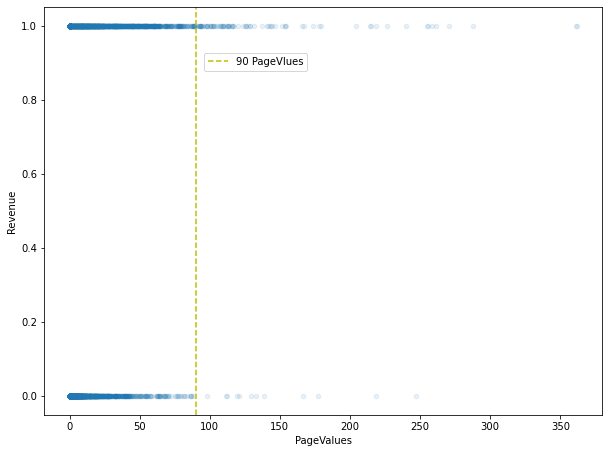

In [13]:
# 'Revenue' & 'PageValues'
fig, ax2 = plt.subplots(figsize=(10,7.5))
df.plot(kind='scatter', x='PageValues', y='Revenue', alpha=0.1, ax=ax2)
plt.axvline(90,0,1, label='90 PageVlues', c = 'y', ls='--')
#plt.legend(loc='center left')
plt.legend(bbox_to_anchor=(0.08,0,0.4,0.9))
location_string3 = 'Figure 3 - "Revenue & PageValues"'.center(80)
print(location_string3)
plt.show()

##### Conclusion based on above: Figure 3 - "Revenue & PageValues"
#####  -- This is not quite clear, but we can see if PageValues is over around 90, most of them would generate Revenue. (There are few of them didn't generate Revenue) <br>

                                    Figure 4 - "Sub-Feature Correlations"                                     


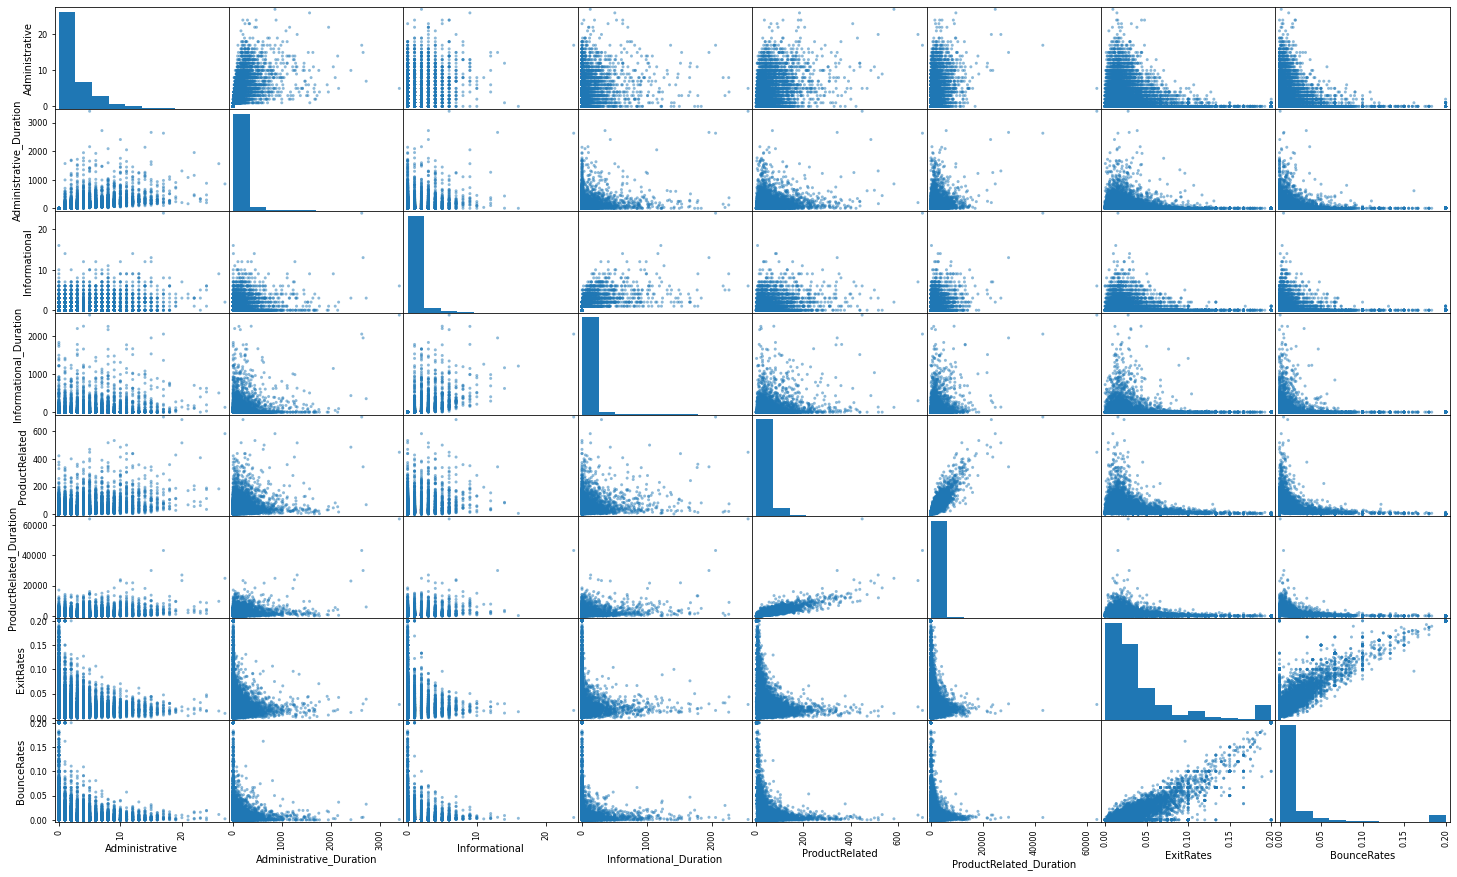

In [14]:
# Four pairs of high correlations
scatter_matrix(df[['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration',
                   'ProductRelated', 'ProductRelated_Duration','ExitRates','BounceRates']],figsize=(25,15))
location_string4 = 'Figure 4 - "Sub-Feature Correlations"'.center(110)
print(location_string4)
plt.show()

##### Conclusion based on above: Figure 4 - "Sub-Feature Correlations"
#####  -- We can see there are two pairs with clear linear correlation: ProductRelated - ProductRelated_Duration with 0.86 and BounceRates - Exit Rates  with 0.91. (We have checked in Figure 2 - "Correlation Matrix"<br>

## Machine Leaning - Build different models: Classification and Cluster models

#### - Data Cleaning and Handling Text data

In [15]:
le = LabelEncoder()
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Weekend'] = df['Weekend'].map({False:0, True:1})

##### <br>- Check unique months, and transfer string to number accordingly (Feb - 2; Mar - 3 etc.) We will use it for Machine Learning later.

In [16]:
print(df['Month'].unique())

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']


In [17]:
TheMonth = {'Feb':2, 'Mar':3, 'May':5,'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct': 10, 'Nov':11, 'Dec':12}
df['Month'] = df['Month'].map(TheMonth)

In [18]:
df_x = df.drop(['Revenue'], axis =1)
df_y = df['Revenue']

#### - feature Statistic scale check

In [19]:
df.describe()  # Since it is Jupyter notebook, we don't use 'Print' here would make result easy to read

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,7.651987,2.124006,2.357097,3.147364,4.069586,1.718329,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.392841,0.911325,1.717277,2.401591,4.025169,0.690759,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,2.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


From above basic statistic function, we can see there are few features have very big scales: Administrative_Duration; Informational_Duration; ProductRelated_Duration; PageValues. Machine Learning don't perform well when the input numerical attributes have very different scales.<br>
Below is the example chart for "ProductRelated_Duration", there is a value higher than 60,000 and another one around 40,000. These would be outlier and affect the Machine Learning.

    Figure 5 - "ProductRelated_Duration Scale"    


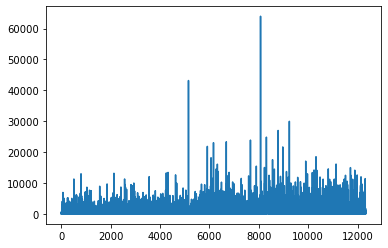

In [20]:
plt.plot(df['ProductRelated_Duration'])
location_string5 = 'Figure 5 - "ProductRelated_Duration Scale"'.center(50)
print(location_string5)
plt.show()

#### - Transformation Pipelines (StandardScale)

In [106]:
# get columns needed to scale
df_Scale = df[['Administrative_Duration', 'Informational_Duration',
                   'ProductRelated_Duration']]

In [112]:
# get columns don't need scale
Non_Scale_Columns = ['Administrative', 'Informational','ProductRelated', 'BounceRates','ExitRates',
                   'PageValues','SpecialDay','Month','OperatingSystems','Browser','Region',
                   'TrafficType','VisitorType','Weekend']

In [108]:
# ust Pipeline class to help us for the transformations
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])
df_Scale_After = num_pipeline.fit_transform(df_Scale)
df_Scale_After = pd.DataFrame(df_Scale_After, columns = df_Scale.columns)

# combine scaled columns and non-scaled columns together
df_x = pd.concat([df_Scale_After, df[Non_Scale_Columns]], axis = 1)

# We will test different machine learning methods and find out which one would be the best model.
#### - We will do deep analysis for model RandomForestClassifier, all other models would have the similar logics, we don't need to explain again.
#### - After we find the best model, at the end, we will use GridSearchCV to find the best parameters.


### 1) RandomForestClassifier Model

In [229]:
Model_Name1 = 'RandomForestClassifier'  #setup the model name

# run RandomForestClassifier Model
clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, n_jobs=-1)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

# test model's accuracy
print(Model_Name1 + ' Model Accuracy: %.2f' % round(accuracy_score(y_pred, y_test)*100,2) + '%')

RandomForestClassifier Model Accuracy: 88.40%


#### Confusion Matrix

It is a table that gives a visual representation of performance of a classification. Each row in the table represents the instances in an actual class and each column represents the instances in a predicted class. Rows and columns can be interchanged.  

RandomForestClassifier Model confusion matrix: 
[[2015  252]
 [  40  159]]


************************************************

     Figure 6 - "Confusion Matrix"      


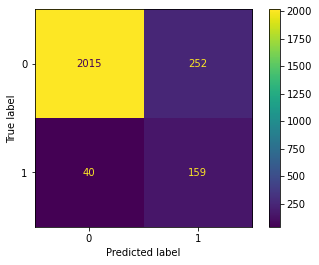

************************************************


          Figure 7 - "Model classification report"          
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      2267
           1       0.39      0.80      0.52       199

    accuracy                           0.88      2466
   macro avg       0.68      0.84      0.73      2466
weighted avg       0.93      0.88      0.90      2466



In [195]:
print(Model_Name1 + ' Model confusion matrix: ')
print(confusion_matrix(y_pred, y_test))

print("\n")
print("************************************************")

print("")
#plot_confusion_matrix(clf, x_test, y_test)  # This would show up warning, so replace it with below
ConfusionMatrixDisplay.from_predictions(y_pred, y_test)
location_string6 = 'Figure 6 - "Confusion Matrix"'.center(40)
print(location_string6)
plt.show()

print("************************************************")
print("\n")

#print(Model_Name + '  Model classification report: ')
location_string7 = 'Figure 7 - "Model classification report"'.center(60)
print(location_string7)
print(classification_report(y_pred, y_test))

##### Below shows the function for Confusion Matrix. We can see the accuracy is 0.89 (total 1), which is pretty good model.<br>
Precision = Positive Predictive Value = $\frac{TP}{TP+FP} $ = $\frac{170}{170+241} $ = 0.41

Recall = True Positive rate = $\frac{TP}{TP+FN} $ = $\frac{170}{170+42} $  = 0.80 

Accuracy = $ \frac{TP+TN}{TP+TN+FP+FN} $ = 0.89

#### ROC and AUCROC

Receiver Operating Characteristic curve, ROC curve is computed by plotting the True Positive Rate (TPR) with False Positive Rate (FPR) for different thresholds. 

Area Under the Receciver Operating Characteristic Curve, AUCROC, measures the separability of classes. Area close to 1 means the classes are properly classified. AUC under 0.5 means the classification is not good. 

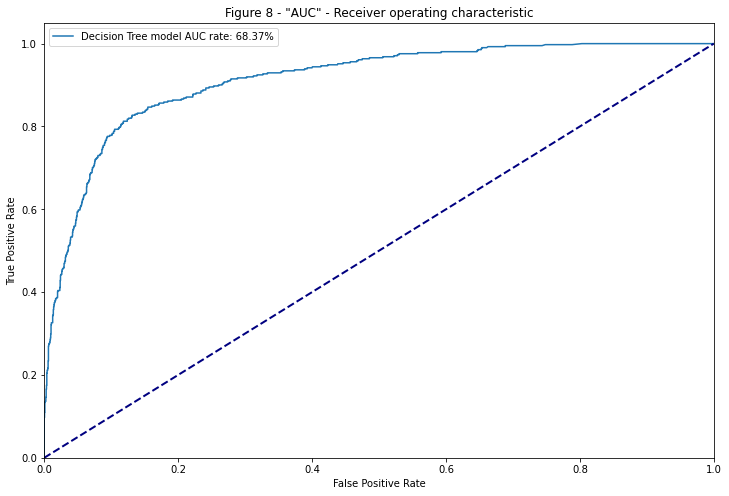

In [196]:
y_pred_prob = clf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
logic_AUC = Model_Name + str(" model AUC rate: %.2f" % round(roc_auc_score(y_test, y_pred)*100,2)) + '%' 

plt.figure(figsize=(12,8))
location_string8 = 'Figure 8 - "AUC"'
plt.title(location_string8 + ' - ' + 'Receiver operating characteristic')

plt.plot(fpr, tpr, label = logic_AUC )
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="upper left")
plt.show()

#### RandomForestClassifier Model Conclusion:
Few statistic results:<br>
- Model accuracy: 88.52% (Machine Learning - based on the train data sets to train the model and use test data sets to predict the result, we can get 88.52% accuracy)
- AUC (area under curve): 69.66% (the number is higher than 50.00%, even not close to 100%, but not bad result) <br>

Final conclusion: <br>
We can base on shoppers' online behavior to forecast if they generate revenue or not (buy products or not), merchants can target the potential buyers and fully utilize advertisements. But, we can see the model's accuracy is lower than 90.00%, the way to approve it would be collecting more shoppers' information, like: 'gender', 'age', 'profession' etc. But, the information are very sensitive, wouldn't be easy to collect. But overall RandomForestClassifier Model is good machine learning mothod for the project.

### 2) Decision Tree Model
##### Based on below analysis, we can see Decision Tree Model is not bad, but not good as RandomForestClassifier Model. So we will keep our first model - RandomForestClassifier Model as the best choice so far.

In [228]:
Model_Name2 = 'Decision Tree'

clf = DecisionTreeClassifier(random_state=42)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(Model_Name2 + ' Model Accuracy: %.2f' % round(accuracy_score(y_pred, y_test)*100,2) + '%')

Decision Tree Model Accuracy: 85.44%


Decision Tree - Figure 9 "Confusion Matrix"


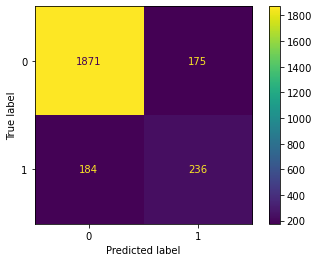

************************************************


Decision Tree  Model classification report: 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2046
           1       0.57      0.56      0.57       420

    accuracy                           0.85      2466
   macro avg       0.74      0.74      0.74      2466
weighted avg       0.85      0.85      0.85      2466



In [207]:
location_string9 = Model_Name2 + ' - Figure 9 "Confusion Matrix"'.center(30)
print(location_string9)
ConfusionMatrixDisplay.from_predictions(y_pred, y_test)
plt.show()

print("************************************************")
print("\n")

print(Model_Name2 + '  Model classification report: ')
print(classification_report(y_pred, y_test))

### 3) Naive Bayes Model

##### Based on below analysis, we can see Naive Bayes is not bad, but not good as RandomForestClassifier Model. So we will keep our first model - RandomForestClassifier Model as the best choice so far.

In [227]:
Model_Name3 = 'Naive Bayes'

clf = GaussianNB()
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(Model_Name3 + ' Model Accuracy: %.2f' % round(accuracy_score(y_pred, y_test)*100,2) + '%')

Naive Bayes Model Accuracy: 78.02%


Naive Bayes - Figure 10 "Confusion Matrix"


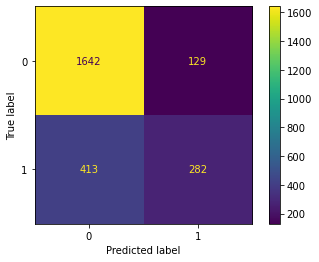

************************************************


Decision Tree  Model classification report: 
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1771
           1       0.69      0.41      0.51       695

    accuracy                           0.78      2466
   macro avg       0.74      0.67      0.68      2466
weighted avg       0.77      0.78      0.76      2466



In [216]:
location_string10 = Model_Name3 + ' - Figure 10 "Confusion Matrix"'.center(30)
print(location_string10)
ConfusionMatrixDisplay.from_predictions(y_pred, y_test)
plt.show()

print("************************************************")
print("\n")

print(Model_Name + '  Model classification report: ')
print(classification_report(y_pred, y_test))

### 4) SVM

##### Based on below analysis, we can see SVM is very good, better than RandomForestClassifier Model. So we will use SVM as the final model. (Randomly selected parameters, we will run GridSearchSV to find the best parameters)
&ensp;RandomForestClassifier: <br>
&ensp;&ensp;&ensp;    Accuracy - 88.40% <br>
&ensp;&ensp;&ensp;    AUC - 68.37% <br>
&ensp;SVM: <br>
&ensp;&ensp;&ensp;    Accuracy - 88.69% <br>
&ensp;&ensp;&ensp;    AUC - 73.55% <br>

#### SVM model

In [235]:
Model_Name4 = 'SVM'
clf = svm.SVC(kernel = 'rbf', probability=True, random_state=True)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(Model_Name4 + ' Model Accuracy: %.2f' % round(accuracy_score(y_pred, y_test)*100,2) + '%')

SVM Model Accuracy: 88.69%


#### Confusion Matrix

SVM Model confusion matrix: 
[[1978  202]
 [  77  209]]


************************************************

     Figure 11 - "Confusion Matrix"     


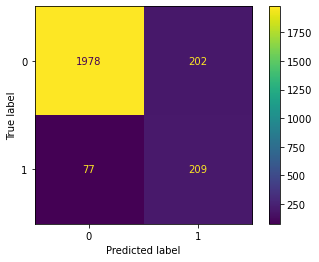

************************************************


         Figure 12 - "Model classification report"          
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      2180
           1       0.51      0.73      0.60       286

    accuracy                           0.89      2466
   macro avg       0.74      0.82      0.77      2466
weighted avg       0.91      0.89      0.90      2466



In [224]:
print(Model_Name4 + ' Model confusion matrix: ')
print(confusion_matrix(y_pred, y_test))

print("\n")
print("************************************************")

print("")
#plot_confusion_matrix(clf, x_test, y_test)  # This would show up warning, so replace it with below
ConfusionMatrixDisplay.from_predictions(y_pred, y_test)
location_string11 = 'Figure 11 - "Confusion Matrix"'.center(40)
print(location_string11)
plt.show()

print("************************************************")
print("\n")

#print(Model_Name + '  Model classification report: ')
location_string12 = 'Figure 12 - "Model classification report"'.center(60)
print(location_string12)
print(classification_report(y_pred, y_test))

#### ROC and AUCROC

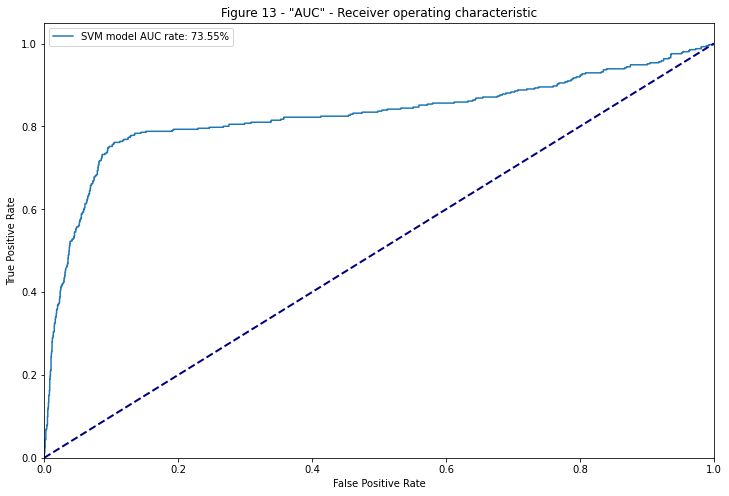

In [225]:
y_pred_prob = clf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
logic_AUC = Model_Name + str(" model AUC rate: %.2f" % round(roc_auc_score(y_test, y_pred)*100,2)) + '%' 

plt.figure(figsize=(12,8))
location_string13 = 'Figure 13 - "AUC"'
plt.title(location_string13 + ' - ' + 'Receiver operating characteristic')

plt.plot(fpr, tpr, label = logic_AUC )
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="upper left")
plt.show()

#### SVM GridSearchCV - Best Parameters

In [232]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':['linear', 'rbf', 'poly'], 'C':[1, 5, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid = parameters, cv = 3, verbose=True, n_jobs=-1)
final_clf = clf.fit(x_train, y_train)

print(sorted(final_clf.cv_results_.keys()))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_C', 'param_kernel', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']


#### Find the best Parameters for SVM model

In [237]:
print(final_clf.best_estimator_)
print(final_clf.best_params_)

SVC(C=5)
{'C': 5, 'kernel': 'rbf'}


Conclusion:<br>
We found the best kernel is 'rbf', the best C value is 5. However, we only used three possibilities for C:1,5,10. we may need to try different values to see how it performance, the values between 1 to 5, 5 to 10 and higher than 10. Below is the "for loop" to test the theory.

In [252]:
C_Values = []
Accuracy_Values = []

for i in (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20):
    Model_Name4 = 'SVM'
    clf = svm.SVC(kernel = 'rbf', probability=True, random_state=True, C = i)
    x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 42)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    C_Values.append(i)
    Accuracy_Values.append(round(accuracy_score(y_pred, y_test)*100,2))
    print(Model_Name4 + ' Model Accuracy: %.2f' % round(accuracy_score(y_pred, y_test)*100,2) + '%' 
          + ' - C values: ' + str(i)) 

SVM Model Accuracy: 88.69% - C values: 1
SVM Model Accuracy: 88.61% - C values: 2
SVM Model Accuracy: 88.73% - C values: 3
SVM Model Accuracy: 88.73% - C values: 4
SVM Model Accuracy: 88.73% - C values: 5
SVM Model Accuracy: 88.73% - C values: 6
SVM Model Accuracy: 88.81% - C values: 7
SVM Model Accuracy: 88.81% - C values: 8
SVM Model Accuracy: 88.81% - C values: 9
SVM Model Accuracy: 88.73% - C values: 10
SVM Model Accuracy: 88.77% - C values: 11
SVM Model Accuracy: 88.77% - C values: 12
SVM Model Accuracy: 88.77% - C values: 13
SVM Model Accuracy: 88.73% - C values: 14
SVM Model Accuracy: 88.81% - C values: 15
SVM Model Accuracy: 88.73% - C values: 16
SVM Model Accuracy: 88.69% - C values: 17
SVM Model Accuracy: 88.73% - C values: 18
SVM Model Accuracy: 88.73% - C values: 19
SVM Model Accuracy: 88.73% - C values: 20


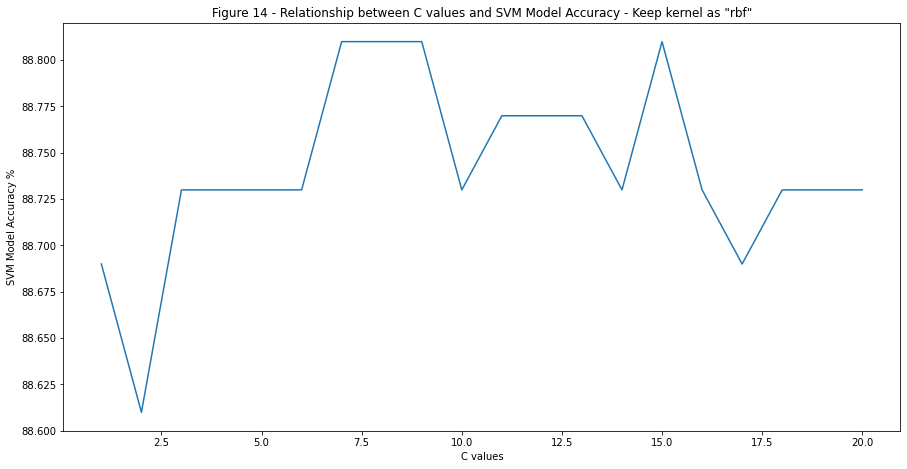

In [258]:
# create chart to show the relationship between accuracy and different C values
plt.figure(figsize = (15,7.5))
plt.plot(C_Values,Accuracy_Values)
plt.xlabel('C values')
plt.ylabel('SVM Model Accuracy %')
plt.title('Figure 14 - Relationship between C values and SVM Model Accuracy - Keep kernel as "rbf"')
plt.show()

Based on above we can see when C value is 7,8,9 or 15 would product the same highest accuracy. We can use any of the four values for our final SVM model. (We will choose 7 for below test)

In [259]:
Model_Name4 = 'SVM'
clf = svm.SVC(kernel = 'rbf', probability=True, random_state=True, C = 7)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(Model_Name4 + ' Model Accuracy: %.2f' % round(accuracy_score(y_pred, y_test)*100,2) + '%')

SVM Model Accuracy: 88.81%


Since the accuracy imporved from 88.69% (our initial SVM model) to 88.81% (final SVM model with best parameters), we would assume the AUC would also improve. Let's test below.

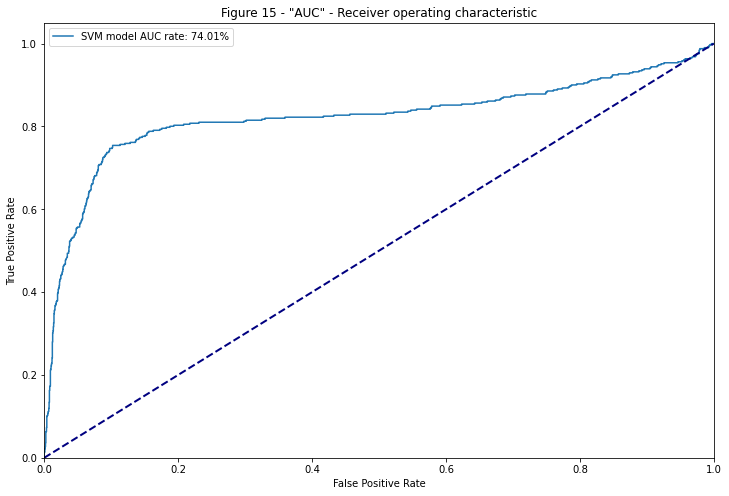

In [262]:
# Re-run the AUC, get the best result
y_pred_prob = clf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
logic_AUC = Model_Name + str(" model AUC rate: %.2f" % round(roc_auc_score(y_test, y_pred)*100,2)) + '%' 

plt.figure(figsize=(12,8))
location_string15 = 'Figure 15 - "AUC"'
plt.title(location_string15 + ' - ' + 'Receiver operating characteristic')

plt.plot(fpr, tpr, label = logic_AUC )
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="upper left")
plt.show()

We can see the AUC increased to 74.01% from 73.55%, even it is small, but still made improvement if we choose better parameters. Best parameter: C is 7 (or 8,9,15 would generate same result), kernel is 'rbf'.

# Final Conclusion:
Through the whole process we figure out the best machine learning model to predict online shoppers' behavior and how to utilize the data predict if they purhcase products or not (generate revenue). 

First - We split the 17 features and 1 target (revenue).

Second - We take first look about the data structure.

Third - We clean up the data, transform data and make it easy to fit machine learning model.

Fourth - We try different machine learning models: train model, test accuray, precision rate, recall rate, test confusion matrix and AUC etc.

Firth - We compare different machine learning models and find the best one.

Sixth - We use GridSearchCV get the best parameters for the best model.

Finally, we figure out the best result. The best model is SVM, best parameters for C is 7 (or 8,9,15), for Kernel is 'rbf'. Model accuracy is 88.81%, AUC is 74.01%. If we want to imporve more, the way would be to collect more shoppers' information, like: 'gender', 'age', 'profession' etc. But, the information are very sensitive, wouldn't be easy to collect. But overall SVM Model is good machine learning mothod for the project.